# PROJECT TITLE: Predicting and Aiding Post-partum Depression Symptoms via Talkbot

# Model Building and Comparison - Review II

In [3]:




import numpy as np
import pandas as pd 





In [2]:
df = pd.read_csv(r"D:\Datasets\post natal data.csv")

In [3]:
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [4]:
df.sample(3)

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
444,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
139,6/15/2022 0:25,40-45,Yes,No,Yes,Yes,Yes,No,Yes,Sometimes,Not interested to say
1053,6/15/2022 0:30,45-50,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [6]:
df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [7]:
df =df.dropna()

In [8]:
df.shape

(1491, 11)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

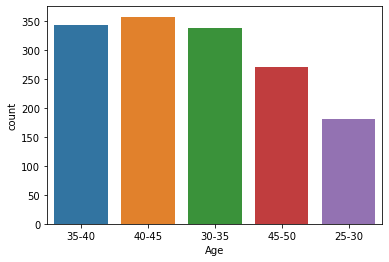

In [9]:
import seaborn as sns
sns.countplot(df["Age"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Suicide attempt', ylabel='count'>

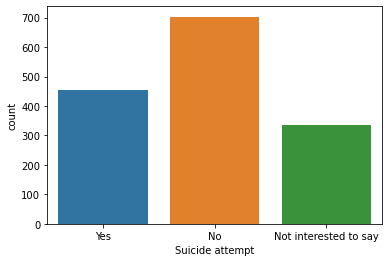

In [10]:
sns.countplot(df["Suicide attempt"])

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df["Trouble sleeping at night"].value_counts()

Two or more days a week    637
Yes                        439
No                         415
Name: Trouble sleeping at night, dtype: int64

<AxesSubplot:>

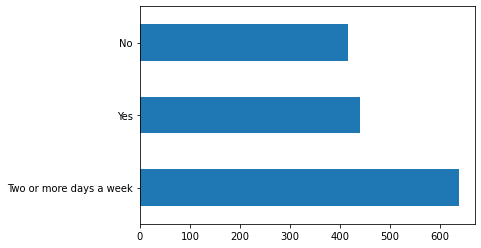

In [13]:
df["Trouble sleeping at night"].value_counts().plot(kind='barh')

In [14]:
df =df.drop(columns="Timestamp")

In [15]:
df.describe().round(2).style.background_gradient()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1491,1491,1491,1491,1491,1491,1491,1491,1491,1491
unique,5,3,3,3,3,3,2,3,3,3
top,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,358,527,549,637,583,835,968,621,554,703


In [16]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# Select the categorical feature you want to encode
categorical_feature = df[['Age']]
encoded_feature = encoder.fit_transform(categorical_feature)
df['Age'] = encoded_feature
df.head(2)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2.0,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,3.0,Yes,No,No,Yes,Yes,No,Yes,Yes,No


In [17]:
df.Age.value_counts()

3.0    358
2.0    343
1.0    338
4.0    271
0.0    181
Name: Age, dtype: int64

In [18]:
encoder = OrdinalEncoder()
# Select the categorical feature you want to encode
categorical_feature = df[['Feeling sad or Tearful']]
encoded_feature = encoder.fit_transform(categorical_feature)
df['Feeling sad or Tearful'] = encoded_feature

In [19]:
encoder = OrdinalEncoder()
# Select the categorical feature you want to encode
categorical_feature = df[['Irritable towards baby & partner']]
encoded_feature = encoder.fit_transform(categorical_feature)
df['Irritable towards baby & partner'] = encoded_feature

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Irritable towards baby & partner'] = le.fit_transform(df['Irritable towards baby & partner'])
df['Trouble sleeping at night'] = le.fit_transform(df['Trouble sleeping at night'])
df['Problems concentrating or making decision'] = le.fit_transform(df['Problems concentrating or making decision'])
df['Overeating or loss of appetite'] = le.fit_transform(df['Overeating or loss of appetite'])
df['Feeling anxious'] = le.fit_transform(df['Feeling anxious'])
df['Problems of bonding with baby'] = le.fit_transform(df['Problems of bonding with baby'])
df['Suicide attempt'] = le.fit_transform(df['Suicide attempt'])
df['Feeling of guilt'] = le.fit_transform(df['Feeling of guilt'])


<AxesSubplot:>

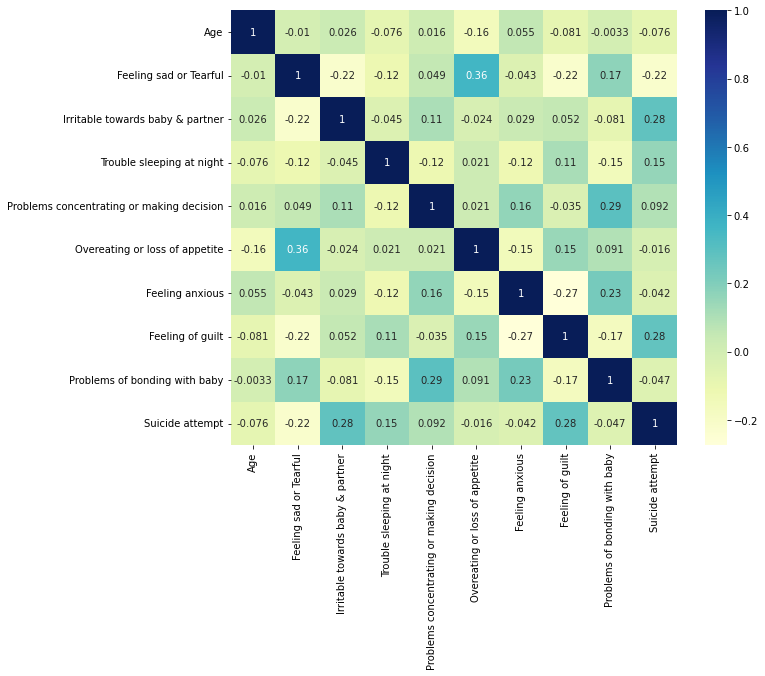

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="YlGnBu" )


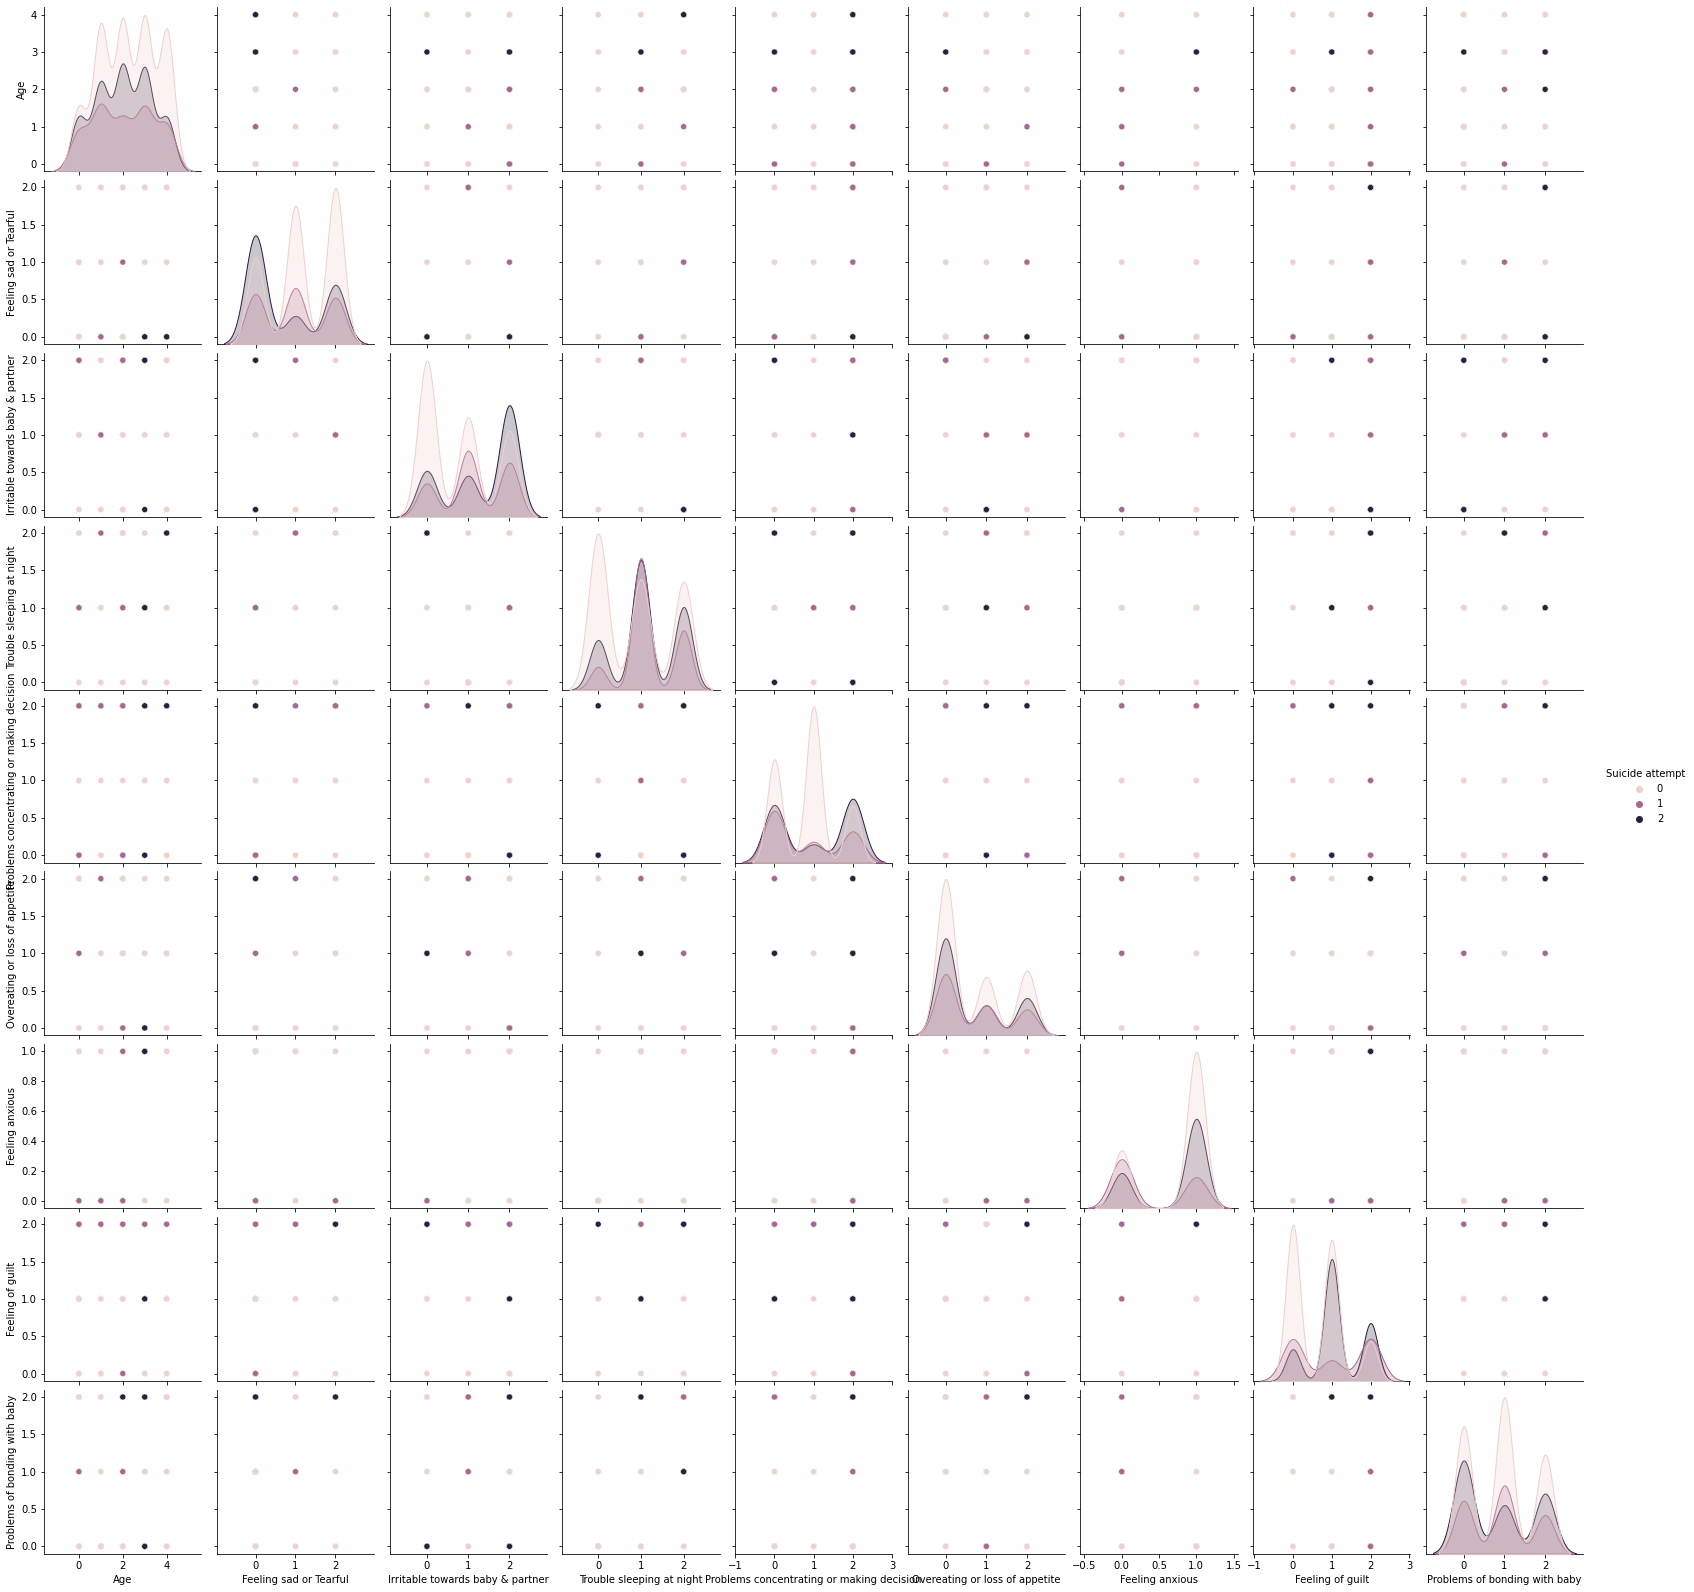

In [22]:
sns.pairplot(df, hue='Suicide attempt', height=2.5)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=df[df.columns[:9]]
y=df["Suicide attempt"]
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Irritable towards baby & partner,0.133131
Trouble sleeping at night,0.128665
Feeling sad or Tearful,0.125193
Feeling of guilt,0.118327
Problems concentrating or making decision,0.116593
Overeating or loss of appetite,0.112494
Problems of bonding with baby,0.110271
Age,0.093424
Feeling anxious,0.061902


In [24]:
X= df[["Irritable towards baby & partner",'Trouble sleeping at night','Feeling sad or Tearful','Feeling of guilt','Problems of bonding with baby',"Problems concentrating or making decision"]]
y =df["Suicide attempt"]

In [25]:
X

,Irritable towards baby & partner,Trouble sleeping at night,Feeling sad or Tearful,Feeling of guilt,Problems of bonding with baby,Problems concentrating or making decision
0,2,1,2.0,1,2,2
1,0,0,2.0,2,2,2
2,0,2,2.0,1,1,2
3,2,2,2.0,0,0,2
4,0,1,2.0,1,2,2
...,...,...,...,...,...,...
1498,0,1,2.0,0,1,0
1499,0,0,1.0,0,2,1
1500,1,1,0.0,2,0,0
1501,1,2,0.0,1,0,1


In [26]:
y

0       2
1       0
2       0
3       0
4       0
       ..
1498    0
1499    0
1500    1
1501    0
1502    0
Name: Suicide attempt, Length: 1491, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Predict using the Random Forest Classifier
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy of the Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Fit a Logistic Regression Classifier
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Predict using the Logistic Regression Classifier
y_pred_lr = lr.predict(X_test)

# Calculate the accuracy of the Logistic Regression Classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Fit a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict using the Decision Tree Classifier
y_pred_dt = dt.predict(X_test)

# Calculate the accuracy of the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Fit a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict using the K-Nearest Neighbors Classifier
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the K-Nearest Neighbors Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Fit a Support Vector Machine Classifier
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

# Predict using the Support Vector Machine Classifier
y_pred_svm = svm.predict(X_test)

# Calculate the accuracy of the Support Vector Machine Classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [29]:
models = {
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_lr,
    "Decision Tree": accuracy_dt,
    "K-Nearest Neighbors": accuracy_knn,
    "Support Vector Machine": accuracy_svm
}

# Sort the models by accuracy
sorted_models = {k: v for k, v in sorted(models.items(), key=lambda item: item[1], reverse=True)}

# Print the accuracy of each model
for k, v in sorted_models.items():
    print(f"{k}: {v:.2f}")

Decision Tree: 0.90
Random Forest: 0.90
K-Nearest Neighbors: 0.81
Support Vector Machine: 0.79
Logistic Regression: 0.56


In [30]:
print(y_pred_dt)

[1 2 0 0 2 2 2 2 0 2 1 0 2 2 2 2 1 0 0 0 2 0 1 2 0 0 0 2 2 0 0 1 0 0 2 0 1
 2 2 1 2 0 0 2 2 0 0 0 0 2 0 2 1 0 2 0 2 1 0 0 2 0 0 2 0 0 1 0 0 0 1 0 1 2
 2 0 1 0 1 2 0 1 0 1 2 1 1 2 0 1 0 2 2 0 0 2 1 0 0 0 2 2 0 0 0 0 0 2 0 1 0
 0 0 0 0 0 0 1 0 2 2 0 0 1 1 0 0 0 0 0 0 0 2 2 2 0 0 0 2 1 2 0 0 0 0 1 0 0
 2 0 0 1 1 2 0 2 0 0 2 2 0 0 1 0 2 2 0 0 0 0 2 2 0 2 1 2 2 2 2 1 0 0 0 0 0
 0 2 0 1 1 1 0 0 0 0 2 0 0 0 0 2 0 0 2 1 1 2 2 0 1 2 0 0 2 0 0 2 0 2 1 2 2
 2 2 2 0 2 0 1 0 2 1 0 2 0 1 1 2 2 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 2 2 0 0
 1 0 2 0 2 1 1 0 1 0 2 2 0 0 0 0 2 0 0 0 0 0 0 2 1 0 2 2 0 0 1 0 1 0 0 1 2
 0 0 0]


In [31]:
print(y_test)

9       1
1099    2
510     0
326     0
561     0
       ..
478     1
39      2
830     0
1470    0
1465    0
Name: Suicide attempt, Length: 299, dtype: int64


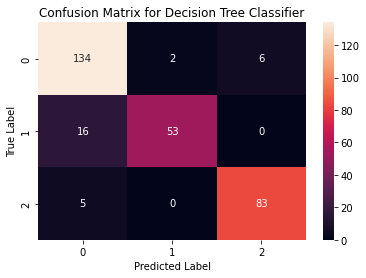

In [32]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")

# Show the plot
plt.show()

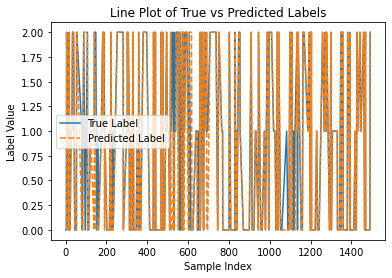

In [33]:
data = {"True Label": y_test, "Predicted Label": y_pred_dt}
df = pd.DataFrame(data)

# Plot the line plot
sns.lineplot(data=df)

# Add labels and title
plt.xlabel("Sample Index")
plt.ylabel("Label Value")
plt.title("Line Plot of True vs Predicted Labels")

# Show the plot
plt.show()

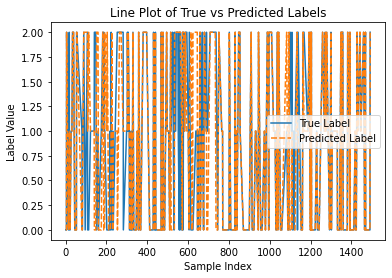

In [34]:
data = {"True Label": y_test, "Predicted Label": y_pred_svm}
df = pd.DataFrame(data)

# Plot the line plot
sns.lineplot(data=df)

# Add labels and title
plt.xlabel("Sample Index")
plt.ylabel("Label Value")
plt.title("Line Plot of True vs Predicted Labels")

# Show the plot
plt.show()

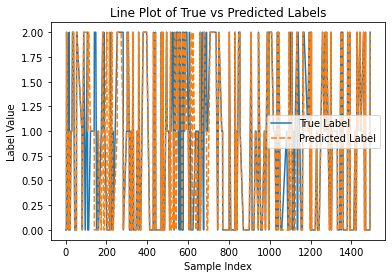

In [35]:
data = {"True Label": y_test, "Predicted Label": y_pred_knn}
df = pd.DataFrame(data)

# Plot the line plot
sns.lineplot(data=df)

# Add labels and title
plt.xlabel("Sample Index")
plt.ylabel("Label Value")
plt.title("Line Plot of True vs Predicted Labels")

# Show the plot
plt.show()